In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
ls

# Single file

In [ ]:
import librosa
x, sr = librosa.load('/Users/murielkosaka/Desktop/capstone_project/audio/audio_speech_actors_01-24/Actor_01/03-01-01-01-01-01-01.wav')

In [ ]:
print(x.shape)
print(sr)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display

In [ ]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

In [ ]:
from IPython.display import Audio

In [ ]:
Audio(data=x, rate=sr)

In [ ]:
single_mfcc = librosa.feature.mfcc(y=x, sr=sr, n_mfcc=13)
plt.figure(figsize=(15, 10))
plt.subplot(3,1,1)
librosa.display.specshow(single_mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

In [ ]:
single_mfcc

# Whole Dataset (1440 files)

In [1]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
import glob 
from sklearn.metrics import confusion_matrix
import IPython.display as ipd  # To play sound in the notebook
import os # interface with underlying OS that python is running on
import sys
import warnings
# ignore warnings 
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.model_selection import train_test_split



/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import of 'jit' requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 =

Modality (01 = full-AV, 02 = video-only, 03 = audio-only).

Vocal channel (01 = speech, 02 = song).

Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).

Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.

Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").

Repetition (01 = 1st repetition, 02 = 2nd repetition).

Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).

So, here's an example of an audio filename. 02-01-06-01-02-01-12.mp4

This means the meta data for the audio file is:

Video-only (02)

Speech (01)

Fearful (06)

Normal intensity (01)

Statement "dogs" (02)

1st Repetition (01)

12th Actor (12) - Female (as the actor ID number is even)

In [ ]:
audio = "/content/drive/My Drive/audio/audio_speech_actors_01-24/"
actor_folders = os.listdir(audio) #list files in audio directory
actor_folders.sort() 
actor_folders[0:5]

In [ ]:
ls -a

In [ ]:
!find . -name '.DS_Store' -type f -delete

In [2]:
audio = "/Users/murielkosaka/Desktop/capstone_project/audio/audio_speech_actors_01-24/"

actor_folders = os.listdir(audio) #list files in audio directory
actor_folders.sort() 
actor_folders[0:5]

['Actor_01', 'Actor_02', 'Actor_03', 'Actor_04', 'Actor_05']

In [3]:
audio

'/Users/murielkosaka/Desktop/capstone_project/audio/audio_speech_actors_01-24/'

In [4]:
# audio/audio/audio_speech_actors_01-24/Actor_14
# 03-01-02-01-02-01-14.wav

emotion = []
gender = []
file_path = []
for i in actor_folders:
    filename = os.listdir(audio + i) #iterate over Actor folders
    for f in filename: # go through files in Actor folder
        part = f.split('.')[0].split('-')
        emotion.append(int(part[2]))
        bg = int(part[6])
        if bg%2 == 0:
            bg = "female"
        else:
            bg = "male"
        gender.append(bg)
        file_path.append(audio + i + '/' + f)

In [5]:
os.listdir(audio + i)

['03-01-03-02-01-02-24.wav',
 '03-01-03-01-02-02-24.wav',
 '03-01-02-02-02-01-24.wav',
 '03-01-02-01-01-01-24.wav',
 '03-01-01-01-01-02-24.wav',
 '03-01-06-01-01-02-24.wav',
 '03-01-05-01-01-01-24.wav',
 '03-01-05-02-02-01-24.wav',
 '03-01-06-02-02-02-24.wav',
 '03-01-04-01-02-02-24.wav',
 '03-01-07-01-02-01-24.wav',
 '03-01-07-02-01-01-24.wav',
 '03-01-04-02-01-02-24.wav',
 '03-01-08-02-01-01-24.wav',
 '03-01-08-01-02-01-24.wav',
 '03-01-05-01-02-02-24.wav',
 '03-01-06-01-02-01-24.wav',
 '03-01-06-02-01-01-24.wav',
 '03-01-05-02-01-02-24.wav',
 '03-01-07-01-01-02-24.wav',
 '03-01-04-01-01-01-24.wav',
 '03-01-04-02-02-01-24.wav',
 '03-01-07-02-02-02-24.wav',
 '03-01-08-02-02-02-24.wav',
 '03-01-08-01-01-02-24.wav',
 '03-01-03-02-02-01-24.wav',
 '03-01-03-01-01-01-24.wav',
 '03-01-02-02-01-02-24.wav',
 '03-01-01-01-02-01-24.wav',
 '03-01-02-01-02-02-24.wav',
 '03-01-04-02-01-01-24.wav',
 '03-01-07-02-01-02-24.wav',
 '03-01-07-01-02-02-24.wav',
 '03-01-04-01-02-01-24.wav',
 '03-01-06-02-

In [6]:
audio_df = pd.DataFrame(emotion)
audio_df = audio_df.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'})
audio_df = pd.concat([pd.DataFrame(gender),audio_df],axis=1)
audio_df.columns = ['gender','emotion']
audio_df['labels'] =audio_df.gender + '_' + audio_df.emotion
audio_df = pd.concat([audio_df,pd.DataFrame(file_path, columns = ['path'])],axis=1)
audio_df = audio_df.drop(['gender', 'emotion'], axis=1)
audio_df.labels.value_counts()

female_fear        96
male_sad           96
male_calm          96
male_surprise      96
female_angry       96
female_disgust     96
male_angry         96
female_calm        96
female_sad         96
male_disgust       96
female_surprise    96
female_happy       96
male_happy         96
male_fear          96
female_neutral     48
male_neutral       48
Name: labels, dtype: int64

In [ ]:
audio_df.to_csv('audio.csv')

In [ ]:

os.listdir(audio)

In [ ]:
fname = audio + 'Actor_02/03-01-01-01-01-01-02.wav'  #female neutral
data_neutral, sr_neutral = librosa.load(fname)
plt.figure(figsize=(10, 5))
librosa.display.waveplot(data_neutral, sr=sr_neutral)
ipd.Audio(fname)

In [ ]:
fname = audio + 'Actor_02/03-01-02-01-01-01-02.wav'  #female calm
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(10, 5))
librosa.display.waveplot(data, sr=sampling_rate)
ipd.Audio(fname)


# MFCC
### The mel frequency cepstral coefficients (MFCCs) of a signal are a small set of features (usually about 10–20) which concisely describe the overall shape of a spectral envelope. MFCC is a good "representation" of the vocal tract that produces the sound. Think of it like an x-ray of your mouth

In [ ]:
fa_mfcc = librosa.feature.mfcc(y=data_neutral, sr=sr_neutral, n_mfcc=13)
plt.figure(figsize=(15, 10))
plt.subplot(3,1,1)
librosa.display.specshow(fa_mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

In [ ]:
# MFCC
#The mel frequency cepstral coefficients (MFCCs) of a signal are a small set of features 
#(usually about 10–20) which concisely describe the overall shape of a spectral envelope.
# good "representation" of the vocal tract that produces the sound. Think of it like an 
# x-ray of your mouth
mfcc = librosa.feature.mfcc(y=data, sr=sampling_rate, n_mfcc=13)

plt.figure(figsize=(15, 10))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar();

In [ ]:
mfcc.shape

In [ ]:
# Male surprised
pathh = audio + 'Actor_09/03-01-08-02-02-02-09.wav'
X, sample_rate = librosa.load(pathh, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
male = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
male = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
print(len(male))

# Female surprised
path= audio + 'Actor_08/03-01-08-02-02-02-08.wav'
X, sample_rate = librosa.load(path,duration=2.5,sr=22050*2,offset=0.5)
female = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
female = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
print(len(female))

plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
plt.plot(female, label='Female Surprised')
plt.plot(male, label='Male Surprised')
plt.legend()



In [ ]:
# Spectrogram - how the audio spectrum varies as a function of time
spectrogram = librosa.feature.melspectrogram(y=X, sr=sampling_rate)
db_spec = librosa.power_to_db(spectrogram, ref=np.max,)
librosa.display.specshow(db_spec,y_axis='mel', x_axis='time', sr=sampling_rate)
plt.colorbar();

## Feature Extraction

In [7]:
df = pd.DataFrame(columns=['mfcc_feature'])

# FEATURE EXTRACTION OVER ENTIRE DATASET
counter=0
for index,path in enumerate(audio_df.path):
    X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=44100,offset=0.5)
    sample_rate = np.array(sample_rate)
    
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13),axis=0)
    df.loc[counter] = [mfccs]
    counter=counter+1   


print(len(df))
df.head()


1440


,mfcc_feature
0,"[-61.862374191339036, -61.862374191339036, -61..."
1,"[-61.50800105381538, -61.50800105381538, -61.5..."
2,"[-55.66308593160217, -56.17033629546251, -56.1..."
3,"[-63.52352959684379, -63.52352959684379, -63.5..."
4,"[-43.19739053316282, -44.238600301837614, -43...."


In [ ]:
df_chroma = pd.DataFrame(columns=['chroma_feat'])

# feature extraction over the entire dataset
counter=0
for index,path in enumerate(audio_df.path):
    X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=44100,offset=0.5)
    sample_rate = np.array(sample_rate)
    
    chroma=np.mean(librosa.feature.chroma_stft(X, sr=sample_rate).T,axis=0)
    df_chroma.loc[counter] = [chroma]
    counter=counter+1   


print(len(df_chroma))
df_chroma.head()

In [ ]:
# def extract_feature(file_name, mfcc, chroma, mel):
#     with soundfile.SoundFile(file_name) as sound_file:
#         X = sound_file.read(dtype="float32")
#         sample_rate=sound_file.samplerate
#         if chroma:
#             stft=np.abs(librosa.stft(X))
#         result=np.array([])
#         if mfcc:
#             mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
#             result=np.hstack((result, mfccs))
#         if chroma:
#             chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
#             result=np.hstack((result, chroma))
#         if mel:
#             mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
#             result=np.hstack((result, mel))

## CNN

In [8]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils, to_categorical
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential, Model, model_from_json
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Dense, Embedding, LSTM

Using TensorFlow backend.


In [9]:
# SET MEANS TO THEIR OWN COLUMNS

df_combined = pd.concat([audio_df,pd.DataFrame(df['mfcc_feature'].values.tolist()),pd.DataFrame(df_chroma['chroma_feat'].values.tolist())],axis=1)
df_combined.head()

NameError: name 'df_chroma' is not defined

In [10]:
# SET MEANS TO THEIR OWN COLUMNS
df = pd.concat([audio_df,pd.DataFrame(df['mfcc_feature'].values.tolist())],axis=1)
df=df.fillna(0)

In [11]:
# TRAIN TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(df.drop(['path','labels'],axis=1)
                                                    , df.labels
                                                    , test_size=0.25
                                                    , shuffle=True
                                                    , random_state=42
                                                   )

X_train[150:160]

,0,1,2,3,4,5,6,7,8,9,...,206,207,208,209,210,211,212,213,214,215
1050,-38.602824,-38.376867,-40.069538,-41.195162,-42.362900,-44.729526,-45.260184,-47.097828,-47.518257,-46.041445,...,-46.052606,-45.207639,-43.329992,-44.557592,-44.176429,-44.633846,-45.570087,-44.207098,-44.271797,-43.716439
1089,-45.079425,-45.182942,-45.832742,-45.270958,-44.004987,-43.305987,-43.619046,-44.168447,-45.227714,-46.027550,...,-34.230139,-34.175652,-34.334331,-35.172133,-36.398492,-33.733008,-32.789335,-31.659165,-24.270392,-19.262934
1272,-55.940431,-53.966883,-48.489172,-46.202820,-48.171796,-52.160146,-53.075813,-51.588053,-51.635007,-54.397662,...,-50.294194,-50.708138,-51.764476,-50.936385,-51.729512,-55.929644,-56.014049,-54.965400,-54.467538,-56.980523
1029,-65.210437,-65.210437,-65.210437,-65.210437,-65.210437,-65.210437,-65.210437,-65.210437,-65.210437,-65.210437,...,-55.057056,-52.671282,-53.739885,-56.870101,-58.528605,-61.192075,-57.778604,-58.670580,-62.437393,-65.043140
1336,-63.728967,-63.728967,-63.728967,-63.728967,-63.728967,-63.728967,-63.728967,-63.728967,-63.728967,-63.728967,...,-23.142724,-23.274047,-23.532521,-24.240024,-25.887856,-26.925746,-26.725288,-27.133949,-28.466279,-29.287304
328,-63.488734,-60.576644,-56.701765,-56.070490,-58.910577,-61.154979,-59.071259,-56.579099,-55.198979,-56.515550,...,-60.204609,-59.535544,-55.875539,-54.532013,-55.293654,-55.092284,-54.403174,-56.776214,-59.719546,-60.744719
318,-52.120092,-51.624869,-49.452746,-47.018253,-42.051262,-38.245040,-36.825672,-36.134838,-36.307171,-36.386367,...,-52.064366,-51.343363,-50.900494,-49.770724,-49.436901,-49.256986,-49.062109,-48.616749,-45.257563,-41.612494
1108,-56.569065,-59.373479,-61.183981,-58.684713,-59.174422,-58.193958,-58.287371,-58.266463,-58.675418,-57.727294,...,-45.402751,-44.373086,-43.040298,-43.771453,-45.011255,-48.073412,-49.772008,-49.812591,-50.470094,-57.511489
1176,-64.974577,-64.974577,-64.974577,-64.974577,-64.974577,-64.974577,-64.974577,-64.974577,-64.974577,-64.974577,...,-64.974577,-64.490429,-64.711893,-64.748927,-64.647586,-64.494358,-64.790254,-64.974577,-64.974577,-64.974577
12,-73.841370,-73.841370,-73.841370,-73.719655,-73.841370,-73.841370,-73.841370,-73.303635,-72.806811,-73.841370,...,-51.629344,-50.568866,-53.505840,-54.222252,-51.545521,-52.573785,-54.786292,-56.344280,-57.508212,-56.577322


In [12]:
# NORMALIZE DATA
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)

X_train = (X_train - mean)/std
X_test = (X_test - mean)/std

X_train[150:160]

,0,1,2,3,4,5,6,7,8,9,...,206,207,208,209,210,211,212,213,214,215
1050,2.043785,2.076431,1.889681,1.744563,1.590705,1.296221,1.211334,0.986006,0.930114,1.098861,...,-0.028600,0.066520,0.246526,0.165557,0.212588,0.192907,0.138659,0.277094,0.193460,0.182777
1089,1.272987,1.254305,1.187352,1.249924,1.392449,1.467846,1.406848,1.333665,1.202422,1.100510,...,0.987896,1.014428,1.015379,0.969520,0.877493,1.130017,1.236822,1.350468,1.741182,1.898229
1272,-0.019610,0.193268,0.863628,1.136834,0.889372,0.400371,0.280236,0.453107,0.440701,0.106931,...,-0.393291,-0.406102,-0.474363,-0.380853,-0.433095,-0.778156,-0.758720,-0.643192,-0.595494,-0.747719
1029,-1.122858,-1.164874,-1.174098,-1.169930,-1.167775,-1.172998,-1.165396,-1.163597,-1.173193,-1.176606,...,-0.802802,-0.574783,-0.643200,-0.889137,-1.014323,-1.230550,-0.910336,-0.960141,-1.212206,-1.313324
1336,-0.946544,-0.985923,-0.993560,-0.990139,-0.988911,-0.994389,-0.988904,-0.987777,-0.997071,-1.000747,...,1.941192,1.951132,1.938602,1.905968,1.776006,1.715215,1.757864,1.737564,1.416501,1.195004
328,-0.917953,-0.605144,-0.137194,-0.060706,-0.407166,-0.684064,-0.434018,-0.139230,0.017004,-0.144474,...,-1.245389,-1.164585,-0.825733,-0.688855,-0.737780,-0.706170,-0.620309,-0.798093,-1.001898,-1.011783
318,0.435059,0.476166,0.746202,1.037873,1.628331,2.078003,2.216161,2.287094,2.262927,2.244973,...,-0.545491,-0.460683,-0.400519,-0.281002,-0.237109,-0.204529,-0.161387,-0.100116,0.117180,0.330372
1108,-0.094425,-0.459811,-0.683417,-0.377968,-0.439021,-0.327077,-0.340632,-0.339487,-0.396287,-0.288315,...,0.027275,0.138228,0.271286,0.232898,0.141222,-0.102781,-0.222384,-0.202411,-0.286169,-0.784967
1176,-1.094787,-1.136384,-1.145355,-1.141306,-1.139299,-1.144562,-1.137297,-1.135605,-1.145153,-1.148608,...,-1.655511,-1.590326,-1.580970,-1.564040,-1.537410,-1.514436,-1.512800,-1.499397,-1.408535,-1.308514
12,-2.150048,-2.207429,-2.225901,-2.202608,-2.209824,-2.213560,-2.193623,-2.124098,-2.076276,-2.201146,...,-0.508088,-0.394136,-0.623196,-0.662321,-0.417366,-0.489663,-0.653227,-0.761144,-0.830783,-0.719434


In [13]:
# TURN DATA INTO ARRAYS FOR KERAS
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [14]:
y_test

array(['male_angry', 'male_sad', 'female_fear', 'female_disgust',
       'male_happy', 'male_angry', 'female_disgust', 'female_calm',
       'female_calm', 'male_happy', 'female_happy', 'female_calm',
       'male_fear', 'female_fear', 'male_sad', 'female_sad',
       'female_angry', 'male_angry', 'female_surprise', 'female_surprise',
       'female_sad', 'female_calm', 'female_surprise', 'male_fear',
       'female_angry', 'male_happy', 'male_disgust', 'male_disgust',
       'male_fear', 'male_angry', 'male_angry', 'male_fear', 'male_happy',
       'male_disgust', 'male_neutral', 'male_disgust', 'male_disgust',
       'male_disgust', 'female_happy', 'male_sad', 'female_sad',
       'male_neutral', 'female_calm', 'male_sad', 'male_sad',
       'male_surprise', 'female_sad', 'male_calm', 'female_angry',
       'female_angry', 'male_calm', 'female_angry', 'male_happy',
       'female_calm', 'female_calm', 'female_surprise', 'female_fear',
       'female_fear', 'male_happy', 'male_sad', '

In [15]:
len(y_test)

360

In [16]:
# ONE HOT ENCODE THE TARGET
# CNN REQUIRES INPUT AND OUTPUT ARE NUMBERS
lb = LabelEncoder()
y_train = to_categorical(lb.fit_transform(y_train))
y_test = to_categorical(lb.fit_transform(y_test))
print(y_train[0:10])

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


In [17]:
print(lb.classes_)

['female_angry' 'female_calm' 'female_disgust' 'female_fear'
 'female_happy' 'female_neutral' 'female_sad' 'female_surprise'
 'male_angry' 'male_calm' 'male_disgust' 'male_fear' 'male_happy'
 'male_neutral' 'male_sad' 'male_surprise']


In [18]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [19]:
#time series data requires kernel sliding in only one dimension and have spatial properties: 1d CNN
# reshape data to 3d tensor
X_train = X_train[:,:,np.newaxis]
X_test = X_test[:,:,np.newaxis]

X_train.shape

(1080, 216, 1)

In [20]:
import keras
from keras.models import Sequential, Model, model_from_json
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Dense, Embedding, LSTM

#BUILD CNN MODEL

model = Sequential()
model.add(Conv1D(64, 8, padding='same',input_shape=(X_train.shape[1],1)))  # X_train.shape[1] = No. of Columns
model.add(Activation('relu'))
model.add(Conv1D(64, 8, padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 8, padding='same',activation='relu'))
model.add(Conv1D(128, 8, padding='same',activation='relu'))
model.add(Conv1D(128, 8, padding='same',activation='relu'))
model.add(Conv1D(128, 8, padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(256, 8, padding='same',activation='relu'))
model.add(Conv1D(256, 8, padding='same',activation='relu'))
model.add(Flatten())
model.add(Dense(16)) # Target class number
model.add(Activation('softmax'))
# opt = keras.optimizers.SGD(lr=0.0001, momentum=0.0, decay=0.0, nesterov=False)
# opt = keras.optimizers.Adam(lr=0.0001)
opt = keras.optimizers.RMSprop(lr=0.00001, decay=1e-6)
model.summary()

Instructions for updating:
`NHWC` for data_format is deprecated, use `NWC` instead
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 216, 64)           576       
_________________________________________________________________
activation_1 (Activation)    (None, 216, 64)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 216, 64)           32832     
_________________________________________________________________
batch_normalization_1 (Batch (None, 216, 64)           256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 216, 64)           0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 27, 64)            0         
___________________________________________________________

In [21]:
# FIT MODEL
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])
model_history=model.fit(X_train, y_train,batch_size=16, epochs=50, validation_data=(X_test, y_test))

Train on 1080 samples, validate on 360 samples
Epoch 1/50
1080/1080 [==============================] - 6s 6ms/step - loss: 2.7420 - acc: 0.0880 - val_loss: 2.6453 - val_acc: 0.1528
Epoch 2/50
1080/1080 [==============================] - 5s 5ms/step - loss: 2.5594 - acc: 0.1657 - val_loss: 2.5401 - val_acc: 0.2000
Epoch 3/50
1080/1080 [==============================] - 5s 5ms/step - loss: 2.4556 - acc: 0.2185 - val_loss: 2.4596 - val_acc: 0.2139
Epoch 4/50
1080/1080 [==============================] - 5s 5ms/step - loss: 2.3730 - acc: 0.2259 - val_loss: 2.4054 - val_acc: 0.2333
Epoch 5/50
1080/1080 [==============================] - 5s 5ms/step - loss: 2.2915 - acc: 0.2648 - val_loss: 2.3519 - val_acc: 0.2472
Epoch 6/50
1080/1080 [==============================] - 5s 5ms/step - loss: 2.2099 - acc: 0.3037 - val_loss: 2.3058 - val_acc: 0.2583
Epoch 7/50
1080/1080 [==============================] - 5s 5ms/step - loss: 2.1681 - acc: 0.2880 - val_loss: 2.2641 - val_acc: 0.2722
Epoch 8/50
1080

In [22]:
print("Loss of the model is - " , model.evaluate(X_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(X_test,y_test)[1]*100 , "%")

360/360 [==============================] - 0s 1ms/step
Loss of the model is -  1.6981058677037557
360/360 [==============================] - 0s 920us/step
Accuracy of the model is -  40.55555555555556 %


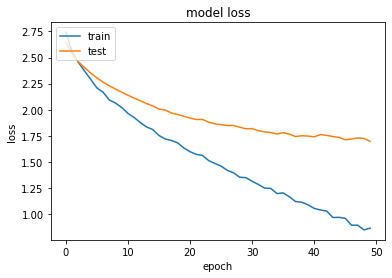

In [23]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# 50 epoch
# val_accuracy = .3972 mfcc
    # .3722 mfcc
# val_accuracy = 0.2139 chroma
# val_accuracy = 0.0639 mfcc + chroma
# 50 epoch - changed random_state
# val_accuracy

KeyError: 'accuracy'

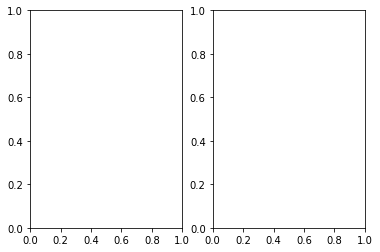

In [25]:
epochs = [i for i in range(12)]
fig , ax = plt.subplots(1,2)
train_acc = model_history.history['accuracy']
train_loss = model_history.history['loss']
val_acc = model_history.history['val_accuracy']
val_loss = model_history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.show()

In [ ]:
X = df_piczak.drop(['esc'],axis=1)
Y = df_piczak['esc']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=42)

In [ ]:
# ranfom forest on MFCC features
rfc_mfcc = RandomForestClassifier(n_estimators=1000, max_depth=None, min_samples_split=2,n_jobs=-1, random_state=42)
rfc_mfcc.fit(X_train,Y_train)

## MLP Classifier

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score




In [ ]:
# Extract the mean bands to its own feature columns
df = pd.concat([audio_df,pd.DataFrame(df['mfcc_feature'].values.tolist())],axis=1)
df=df.fillna(0)

In [ ]:
# Split between train and test 
X_train, X_test, y_train, y_test = train_test_split(df.drop(['path','labels'],axis=1)
                                                    , df.labels
                                                    , test_size=0.25
                                                    , shuffle=True
                                                    , random_state=22
                                                   )

# Lets see how the data present itself before normalisation 
X_train[150:160]

In [ ]:
model=MLPClassifier(alpha=0.01, batch_size=216,epsilon=1e-08, hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=500)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [ ]:
#DataFlair - Calculate the accuracy of our model
from sklearn.metrics import accuracy_score

accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)
#DataFlair - Print the accuracy
print("Accuracy: {:.2f}%".format(accuracy*100))

## RFC

In [ ]:
# Split between train and test 
X_train, X_test, y_train, y_test = train_test_split(df.drop(['path','labels'],axis=1)
                                                    , df.labels
                                                    , test_size=0.25
                                                    , shuffle=True
                                                    , random_state=22
                                                   )

# Lets see how the data present itself before normalisation 
X_train[150:160]

In [ ]:
from sklearn import model_selection
# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
# predictions
rfc_predict = rfc.predict(X_test)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
rfc_cv_score = cross_val_score(rfc, X, y, cv=10, scoring=’roc_auc’)


In [ ]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# number of features at every split
max_features = [‘auto’, ‘sqrt’]

# max depth
max_depth = [int(x) for x in np.linspace(100, 500, num = 11)]
max_depth.append(None)
# create random grid
random_grid = {
 ‘n_estimators’: n_estimators,
 ‘max_features’: max_features,
 ‘max_depth’: max_depth
 }
# Random search of parameters
rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the model
rfc_random.fit(X_train, y_train)
# print results
print(rfc_random.best_params_)

In [ ]:
#preparing data
train_data = pd.DataFrame()
train_data['fname'] = train['fname']
test_data = pd.DataFrame()
test_data['fname'] = audio_test_files

train_data = train_data['fname'].apply(get_mfcc, path='../input/audio_train/')
print('done loading train mfcc')
test_data = test_data['fname'].apply(get_mfcc, path='../input/audio_test/')
print('done loading test mfcc')

train_data['label'] = train['label']
test_data['label'] = np.zeros((len(audio_test_files)))